# Dataproject - Fertility and Unemployment rate

#### In this data project we are examining whether there are any correlation between unemployment rates and fertility rates on a municipality level in Denmark in the years from 2007 until 2017. First we download the tables of interest from Denmark Statistics (DST) and then merge them into a combined dataset. One this combined dataset we do some graphical explorations of the evolution of the unemployment rate and the fertility rate and the correlation between the two.

In [9]:
# Importing crucial packages

## In order to run this notebook, GEOPANDAS must be installed. If you are using anaconda, this can be done
## by running the following command in the anaconda promt: "conda install -c conda-forge geopandas"
## Alternatively with pip: "pip install git+git://github.com/geopandas/geopandas.git"


import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
import pandas as pd
import pydst
import geopandas as gpd
dst = pydst.Dst(lang='en')

## 1 Downloading data from DST
We examine what datasets are available from DST

In [10]:
dst.get_subjects()

,active,desc,hasSubjects,id
0,True,Population and elections,True,02
1,True,Living conditions,True,05
2,True,Education and knowledge,True,03
3,True,Culture and National Church,True,18
4,True,"Labour, income and wealth",True,04
5,True,Prices and consumption,True,06
6,True,National accounts and government finances,True,14
7,True,Money and credit market,True,16
8,True,External economy,True,13
9,True,Business sector in general,True,07


We would like to look at "population and elections" because this is where we can find unformation about fertility rates

In [11]:
dst.get_tables(subjects=['02'])

,active,firstPeriod,id,latestPeriod,text,unit,updated,variables
0,True,2008Q1,FOLK1A,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, marital status, time]"
1,True,2008Q1,FOLK1B,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, citizenship, time]"
2,True,2008Q1,FOLK1C,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, ancestry, country of origin..."
3,True,2008Q1,FOLK1D,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, citizenship, time]"
4,True,2008Q1,FOLK1E,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, ancestry, time]"
5,True,1980,FOLK2,2019,Population 1. January,number,2019-02-11 08:00:00,"[age, sex, ancestry, citizenship, country of o..."
6,True,2008,FOLK3,2019,Population 1. January,number,2019-02-11 08:00:00,"[day of birth, birth month, year of birth, time]"
7,True,1769,FT,2019,Population figures from the censuses,number,2019-02-11 08:00:00,"[national part, time]"
8,True,2008,BEF5F,2019,People born in Faroe Islands and living in Den...,number,2019-02-11 08:00:00,"[sex, age, parents place of birth, time]"
9,True,2008,BEF5G,2019,People born in Greenland and living in Denmark...,number,2019-02-11 08:00:00,"[sex, age, parents place of birth, time]"


We use the table with id 'FOD407', that containts information about fertility rates in each municipality in specific years.

In [12]:
FOD407_vars = dst.get_variables(table_id='FOD407')
FOD407_vars['values'][1][:] ## age= TOT1 to include all ages

[{'id': 'TOT1', 'text': 'Total fertility rate'},
 {'id': '15-19', 'text': '15-19 years'},
 {'id': '20-24', 'text': '20-24 years'},
 {'id': '25-29', 'text': '25-29 years'},
 {'id': '30-34', 'text': '30-34 years'},
 {'id': '35-39', 'text': '35-39 years'},
 {'id': '40-44', 'text': '40-44 years'},
 {'id': '45-49', 'text': '45-49 years'}]

In [13]:
#We are only interested in the total fertility rate, hence we write 'ALDER:[TOT1]'

FOD407 = dst.get_data(table_id = 'FOD407', variables={'OMRÅDE':['*'], 'TID':['*'], 'ALDER':['TOT1'] })
FOD407.sort_values(by=['OMRÅDE', 'TID'], ascending=False)
FOD407.head()

,OMRÅDE,TID,ALDER,INDHOLD
0,All Denmark,2006,Total fertility rate,1847.6
1,Region Hovedstaden,2006,Total fertility rate,1706.2
2,Region Sjælland,2006,Total fertility rate,2061.2
3,Region Syddanmark,2006,Total fertility rate,1928.0
4,Region Midtjylland,2006,Total fertility rate,1919.1


We rename each variable

In [14]:
FOD407_en=FOD407.rename(columns={"OMRÅDE": "AREA", "TID": "YEAR", "INDHOLD": "BIRTH_RATE", "ALDER": "AGE"})
FOD407_en.head(10)

,AREA,YEAR,AGE,BIRTH_RATE
0,All Denmark,2006,Total fertility rate,1847.6
1,Region Hovedstaden,2006,Total fertility rate,1706.2
2,Region Sjælland,2006,Total fertility rate,2061.2
3,Region Syddanmark,2006,Total fertility rate,1928.0
4,Region Midtjylland,2006,Total fertility rate,1919.1
5,Region Nordjylland,2006,Total fertility rate,1902.8
6,Province Byen København,2006,Total fertility rate,1555.0
7,Province Københavns omegn,2006,Total fertility rate,1924.9
8,Province Nordsjælland,2006,Total fertility rate,2143.5
9,Province Bornholm,2006,Total fertility rate,1998.8


In [15]:
#Drops AGE

FOD407_en.drop(["AGE"], axis=1, inplace=True)
FOD407_en.head()



,AREA,YEAR,BIRTH_RATE
0,All Denmark,2006,1847.6
1,Region Hovedstaden,2006,1706.2
2,Region Sjælland,2006,2061.2
3,Region Syddanmark,2006,1928.0
4,Region Midtjylland,2006,1919.1


We now look at the category "Labour, income and wealth" at Denmark Statistics

In [16]:
dst.get_tables(subjects=['04'])

,active,firstPeriod,id,latestPeriod,text,unit,updated,variables
0,True,2008Q1,FOLK1A,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, marital status, time]"
1,True,2008Q1,FOLK1B,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, citizenship, time]"
2,True,2008Q1,FOLK1C,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, ancestry, country of origin..."
3,True,2008Q1,FOLK1D,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, citizenship, time]"
4,True,2008Q1,FOLK1E,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, ancestry, time]"
5,True,1980,FOLK2,2019,Population 1. January,number,2019-02-11 08:00:00,"[age, sex, ancestry, citizenship, country of o..."
6,True,2008,FOLK3,2019,Population 1. January,number,2019-02-11 08:00:00,"[day of birth, birth month, year of birth, time]"
7,True,1769,FT,2019,Population figures from the censuses,number,2019-02-11 08:00:00,"[national part, time]"
8,True,2008,BEF5F,2019,People born in Faroe Islands and living in Den...,number,2019-02-11 08:00:00,"[sex, age, parents place of birth, time]"
9,True,2008,BEF5G,2019,People born in Greenland and living in Denmark...,number,2019-02-11 08:00:00,"[sex, age, parents place of birth, time]"


In [17]:
AULP01_vars = dst.get_variables(table_id='AULP01')
AULP01_vars

,elimination,id,map,text,time,values
0,True,OMRÅDE,denmark_municipality_07,region,False,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,True,ALDER,NaN,age,False,"[{'id': 'TOT', 'text': 'Age, total'}, {'id': '..."
2,True,KØN,NaN,sex,False,"[{'id': 'TOT', 'text': 'Total'}, {'id': 'M', '..."
3,False,Tid,NaN,time,True,"[{'id': '2007', 'text': '2007'}, {'id': '2008'..."


In [18]:
AULP01 = dst.get_data(table_id = 'AULP01', variables={'OMRÅDE':['*'], 'ALDER':['TOT'], 'KØN':['TOT'], 'TID':['*'] })
AULP01.head()

,OMRÅDE,ALDER,KØN,TID,INDHOLD
0,Svendborg,"Age, total",Total,2011,6.8
1,Nordfyns,"Age, total",Total,2011,7.4
2,Langeland,"Age, total",Total,2011,7.9
3,Ærø,"Age, total",Total,2011,4.5
4,Haderslev,"Age, total",Total,2011,6.0


In [19]:
AULP01_en = AULP01.rename(columns={"OMRÅDE": "AREA", "ALDER": "AGE", "KØN": "GENDER",\
                                   "TID": "YEAR", "INDHOLD": "UNEMPLOYMENT_RATE"})
AULP01_en.head(6)

,AREA,AGE,GENDER,YEAR,UNEMPLOYMENT_RATE
0,Svendborg,"Age, total",Total,2011,6.8
1,Nordfyns,"Age, total",Total,2011,7.4
2,Langeland,"Age, total",Total,2011,7.9
3,Ærø,"Age, total",Total,2011,4.5
4,Haderslev,"Age, total",Total,2011,6.0
5,Billund,"Age, total",Total,2011,3.7


In [20]:
AULP01_en.drop(["AGE", "GENDER"], axis=1, inplace=True)
AULP01_en.head()

,AREA,YEAR,UNEMPLOYMENT_RATE
0,Svendborg,2011,6.8
1,Nordfyns,2011,7.4
2,Langeland,2011,7.9
3,Ærø,2011,4.5
4,Haderslev,2011,6.0


We now merge the two different datasets.

In [143]:
merged_data = pd.merge(FOD407_en, AULP01_en, on=['YEAR', 'AREA'], how='left')
merged_data.head(200)

,AREA,YEAR,BIRTH_RATE,UNEMPLOYMENT_RATE
0,All Denmark,2006,1847.6,NaN
1,Region Hovedstaden,2006,1706.2,NaN
2,Region Sjælland,2006,2061.2,NaN
3,Region Syddanmark,2006,1928.0,NaN
4,Region Midtjylland,2006,1919.1,NaN
5,Region Nordjylland,2006,1902.8,NaN
6,Province Byen København,2006,1555.0,NaN
7,Province Københavns omegn,2006,1924.9,NaN
8,Province Nordsjælland,2006,2143.5,NaN
9,Province Bornholm,2006,1998.8,NaN


In [144]:
missingrateBirth=merged_data[merged_data['BIRTH_RATE'] == '..']
print(missingrateBirth['AREA'].unique())
print(merged_data.isnull().values.any())

['Christiansø' 'Ærø' 'Fanø' 'Samsø' 'Læsø']
True


We now drop the year 2006 and 2018 since, we don't have any information about the unemployment rate in these years. Also the fertility rates for the municipalities Læsø, Samsø, Ærø, Fanø and Christiansø are not given because of to few observations, so these are dropped from the data set as well. 

In [145]:
## We drop NaN values and censored values
merged_data = merged_data.dropna()
merged_data = merged_data[merged_data['BIRTH_RATE'] != '..']

## We drop areas that are not municipal or country level 
for val in ['Region', 'Province']: 
    I = merged_data.AREA.str.contains(val)
    merged_data = merged_data.loc[I == False] # keep everything else

#Checking if they have been dropped
print(merged_data.AREA.unique())
print(merged_data.AREA.nunique())

['All Denmark' 'Copenhagen' 'Frederiksberg' 'Dragør' 'Tårnby' 'Ballerup'
 'Brøndby' 'Gentofte' 'Gladsaxe' 'Glostrup' 'Herlev' 'Albertslund'
 'Hvidovre' 'Høje-Taastrup' 'Lyngby-Taarbæk' 'Rødovre' 'Ishøj'
 'Vallensbæk' 'Furesø' 'Allerød' 'Fredensborg' 'Helsingør' 'Hillerød'
 'Hørsholm' 'Rudersdal' 'Egedal' 'Frederikssund' 'Halsnæs' 'Gribskov'
 'Bornholm' 'Greve' 'Køge' 'Roskilde' 'Solrød' 'Lejre' 'Odsherred'
 'Holbæk' 'Faxe' 'Kalundborg' 'Ringsted' 'Slagelse' 'Stevns' 'Sorø'
 'Lolland' 'Næstved' 'Guldborgsund' 'Vordingborg' 'Middelfart' 'Assens'
 'Faaborg-Midtfyn' 'Kerteminde' 'Nyborg' 'Odense' 'Svendborg' 'Nordfyns'
 'Langeland' 'Haderslev' 'Billund' 'Sønderborg' 'Tønder' 'Esbjerg' 'Varde'
 'Vejen' 'Aabenraa' 'Fredericia' 'Kolding' 'Vejle' 'Horsens' 'Syddjurs'
 'Norddjurs' 'Favrskov' 'Odder' 'Randers' 'Silkeborg' 'Skanderborg'
 'Aarhus' 'Hedensted' 'Herning' 'Holstebro' 'Lemvig' 'Struer'
 'Ikast-Brande' 'Ringkøbing-Skjern' 'Skive' 'Viborg' 'Morsø' 'Thisted'
 'Brønderslev' 'Frederikshavn

Birth_rate to numeric

In [164]:
merged_data['BIRTH_RATE_F'] = pd.to_numeric(merged_data['BIRTH_RATE'])

## Check if float64
merged_data['BIRTH_RATE_F'].head(10)

116    1843.5
133    1547.0
134    1692.6
135    2109.5
136    2227.0
137    1847.4
138    2015.5
139    1956.2
140    2023.0
141    1841.5
Name: BIRTH_RATE_F, dtype: float64

# Analysis

We start by looking at the structure of the map data

,REGIONKODE,REGIONNAVN,KOMKODE,KOMNAVN,Landsel,Landskode,geometry
0,1084,Region Hovedstaden,0400,Bornholm,Bornholm,8,"(POLYGON ((891187.49 6118170.25, 891186.3 6118..."
1,1085,Region Sjælland,0259,Køge,Østsjælland,7,"(POLYGON ((702347.24 6155011.31, 702342.570000..."
2,1085,Region Sjælland,0350,Lejre,Østsjælland,7,"(POLYGON ((684542.65 6171881.69, 684546.91 617..."
3,1085,Region Sjælland,0265,Roskilde,Østsjælland,7,"(POLYGON ((694011.6900000001 6183259.77, 69402..."
4,1085,Region Sjælland,0269,Solrød,Østsjælland,7,"(POLYGON ((703151.55 6157196.08, 703152.15 615..."


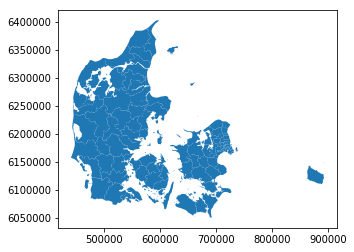

In [148]:
## KOM_MULTIPART.dbf , KOM_MULTIPART.shp and KOM_MULTIPART.shx must be placed 
## in the same folder as the saved notebook, in order for the code to work

## Read the GEO file
map_df = gpd.read_file("KOM_MULTIPART.shp")

## Plot the raw geodata
map_df.plot()

## Look the the structure of the geodata 
map_df.head()

 We are afraid some of the municipals are named differently in the map data and compared to the DST API data

In [149]:
## We find the unique municipals in the map dataset and our DST data
merged_munis = merged_data.AREA.unique()
map_munis = map_df.KOMNAVN.unique()

# List of municipalities in merged_munis that are named different our map data and the opposite
diff1 = [muni for muni in merged_munis if muni not in map_munis] 
diff2 = [muni for muni in map_munis if muni not in merged_munis] 

print(f'Municipalities in our API data but named differently in the map data: {diff1}')
print(f'Municipalities in our map data but named differently in API data: {diff2}')

Municipalities in our API data but named differently in the map data: ['All Denmark', 'Copenhagen', 'Høje-Taastrup']
Municipalities in our map data but named differently in API data: ['København', 'Læsø', 'Samsø', 'Ærø', 'Fanø', 'Christiansø', 'Høje Taastrup']


The map data contains the islands we dropped. This is a proboblem as NaN values cannot be plotted. We address this issue later. We rename our API data

In [150]:
# Copy of the data
merged_data_re = merged_data.copy()

# Adjusting geo-names to merge properly
merged_data_re.loc[merged_data_re.AREA=='Copenhagen', 'AREA'] = 'København'
merged_data_re.loc[merged_data_re.AREA=='Høje-Taastrup', 'AREA'] = 'Høje Taastrup'
merged_data_re.head()

,AREA,YEAR,BIRTH_RATE,UNEMPLOYMENT_RATE,BIRTH_RATE_F
116,All Denmark,2007,1843.5,3.6,1843.5
133,København,2007,1547.0,5.8,1547.0
134,Frederiksberg,2007,1692.6,4.0,1692.6
135,Dragør,2007,2109.5,2.3,2109.5
136,Tårnby,2007,2227.0,3.5,2227.0


The map needs to strings in order to plot - we convert to strings

In [151]:
# strings of the variables
merged_data_re.BIRTH_RATE = merged_data_re.BIRTH_RATE.astype(str)
merged_data_re.UNEMPLOYMENT_RATE = merged_data_re.UNEMPLOYMENT_RATE.astype(str)

## look at datatypes
merged_data_re.dtypes

AREA                  object
YEAR                   int64
BIRTH_RATE            object
UNEMPLOYMENT_RATE     object
BIRTH_RATE_F         float64
dtype: object

Our goal is 4 columns with 2017 and 2007 values for fertility and unemployment. To achive this we split the data in 2017 and 2007 values. We also rename the columns in order to preemtively avoid conflicts of varaibles with the same name

In [166]:
# 2017 and 2007 values
merged_data_re17=merged_data_re[merged_data_re['YEAR']==2017]   
merged_data_re07=merged_data_re[merged_data_re['YEAR']==2007]

# Renaming to year specific names
merged_data_re17=merged_data_re17.rename(columns={'BIRTH_RATE': 'BIRTH_RATE17', 'UNEMPLOYMENT_RATE': 'UNEMPLOYMENT_RATE17' })
merged_data_re07=merged_data_re07.rename(columns={'UNEMPLOYMENT_RATE': 'UNEMPLOYMENT_RATE07', 'BIRTH_RATE': 'BIRTH_RATE07'})
merged_data_re17.head() 

,AREA,YEAR,BIRTH_RATE17,UNEMPLOYMENT_RATE17,BIRTH_RATE_F
1276,Middelfart,2017,2203.3,3.1,2203.3
1278,Assens,2017,1890.9,4.3,1890.9
1279,Faaborg-Midtfyn,2017,1924.8,4.4,1924.8
1280,Kerteminde,2017,1906.0,4.7,1906.0
1281,Nyborg,2017,2072.5,4.5,2072.5


We merge the data from the two years, so the data is in columns next to each other.  

In [167]:
merged_map = pd.merge(merged_data_re07, merged_data_re17, how='left', left_on='AREA', right_on='AREA')
merged_map.head()

,AREA,YEAR_x,BIRTH_RATE07,UNEMPLOYMENT_RATE07,BIRTH_RATE_F_x,YEAR_y,BIRTH_RATE17,UNEMPLOYMENT_RATE17,BIRTH_RATE_F_y
0,All Denmark,2007,1843.5,3.6,1843.5,2017,1751.9,4.3,1751.9
1,København,2007,1547.0,5.8,1547.0,2017,1620.1,5.0,1620.1
2,Frederiksberg,2007,1692.6,4.0,1692.6,2017,1643.8,4.2,1643.8
3,Dragør,2007,2109.5,2.3,2109.5,2017,1752.2,2.9,1752.2
4,Tårnby,2007,2227.0,3.5,2227.0,2017,2037.4,3.6,2037.4


We only want the area variable and the 4 columns with 2 years and 2 variables. The rest is left out

In [156]:
# Keeping some columns
merged_map2 = merged_map[['AREA','BIRTH_RATE07', 'UNEMPLOYMENT_RATE07', 'BIRTH_RATE17', 'UNEMPLOYMENT_RATE17']]
merged_map2.head()

,AREA,BIRTH_RATE07,UNEMPLOYMENT_RATE07,BIRTH_RATE17,UNEMPLOYMENT_RATE17
0,All Denmark,1843.5,3.6,1751.9,4.3
1,København,1547.0,5.8,1620.1,5.0
2,Frederiksberg,1692.6,4.0,1643.8,4.2
3,Dragør,2109.5,2.3,1752.2,2.9
4,Tårnby,2227.0,3.5,2037.4,3.6


We want to merge the DST data on the geo-dataframe in order to plot it. In the final dataset to plot, we cannot have NaN values from the small islands. These are also droppped. 

In [157]:
# Merge
final_map = pd.merge(map_df, merged_map2, how='left', left_on='KOMNAVN', right_on='AREA')

#Dropping missings
final_map = final_map.dropna()

final_map.head()

,REGIONKODE,REGIONNAVN,KOMKODE,KOMNAVN,Landsel,Landskode,geometry,AREA,BIRTH_RATE07,UNEMPLOYMENT_RATE07,BIRTH_RATE17,UNEMPLOYMENT_RATE17
0,1084,Region Hovedstaden,0400,Bornholm,Bornholm,8,"(POLYGON ((891187.49 6118170.25, 891186.3 6118...",Bornholm,2105.2,7.3,1837.7,4.6
1,1085,Region Sjælland,0259,Køge,Østsjælland,7,"(POLYGON ((702347.24 6155011.31, 702342.570000...",Køge,2061.7,3.2,1971.8,3.9
2,1085,Region Sjælland,0350,Lejre,Østsjælland,7,"(POLYGON ((684542.65 6171881.69, 684546.91 617...",Lejre,2552.5,1.9,2126.1,3.2
3,1085,Region Sjælland,0265,Roskilde,Østsjælland,7,"(POLYGON ((694011.6900000001 6183259.77, 69402...",Roskilde,1853.8,2.3,1751.4,3.6
4,1085,Region Sjælland,0269,Solrød,Østsjælland,7,"(POLYGON ((703151.55 6157196.08, 703152.15 615...",Solrød,1881.8,2.6,2185.9,2.7


We need to select variables that the map must base the values after. We name the Visvarxx.. We also need the color sidebar to be have the same range as our map. This is ensured by vmin and vmax. 2007 turns out to have the most extreme values.

In [158]:
## The variable to visualize after is defined here
VisVarFer07 = 'BIRTH_RATE07'
VisVarFer17 = 'BIRTH_RATE17'
VisVarUne07 = 'UNEMPLOYMENT_RATE07'
VisVarUne17 = 'UNEMPLOYMENT_RATE17'

# set the range for the choropleth - this will be consistent for all plots of the same variable.
# 2007 had the most extreme values
vminFer, vmaxFer = merged_map['BIRTH_RATE07'].min() , merged_map['BIRTH_RATE07'].max()
vminUNE, vmaxUNE = merged_map['UNEMPLOYMENT_RATE07'].min() , merged_map['UNEMPLOYMENT_RATE07'].max()

 With missings removed, Læsø, Samsø, Ærø, Fanø and Christiansø are removed on the map. We now make the actual plot. 

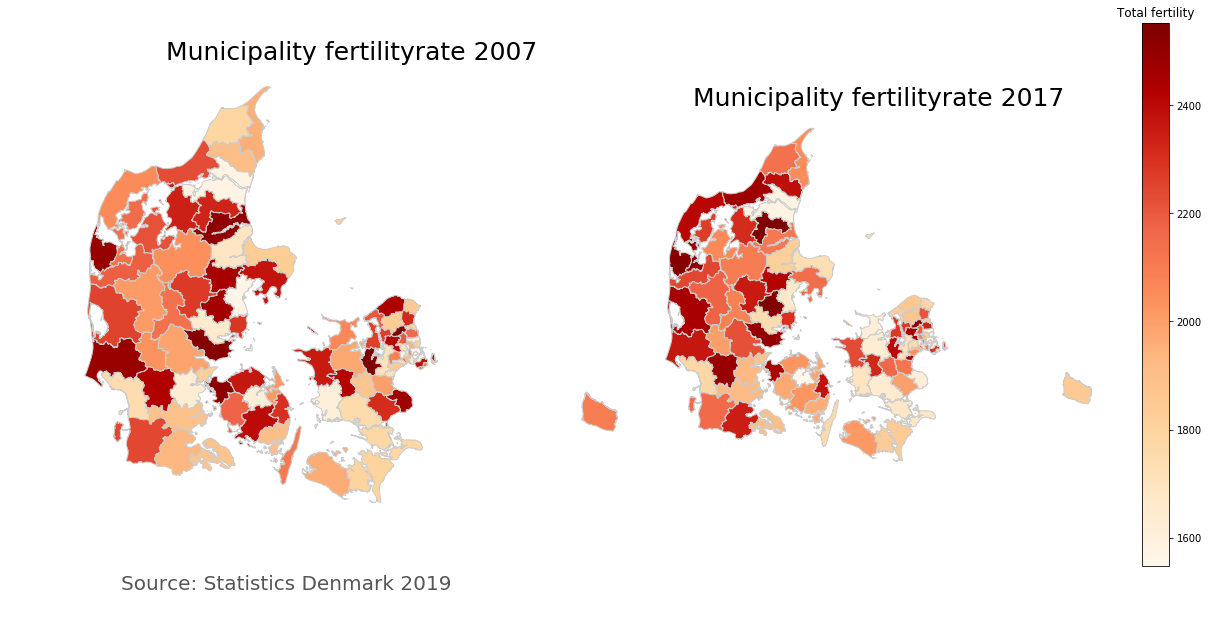

In [159]:
# create figure, axes, size, remove whitespace and align the size of the figures in Matplotlib
side_length = 10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(side_length * 2.1, side_length) , subplot_kw={'aspect': 1})
fig.subplots_adjust(hspace=0.0, wspace=0.0)

# We do not want axis to display values on our map - makes no sense
ax1.axis('off')
ax2.axis('off')

# add a title for map 1 - fix the size of the text.
ax1.set_title('Municipality fertilityrate 2007', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

## The actual plot is created with our colour map being set equal to OrRd
ax1=final_map.plot(column=VisVarFer07,  cmap='OrRd', ax=ax1, edgecolor='0.8')
# Attempt to get two maps of equal size
ax1.set_aspect('equal')

# create an annotation for the  data source
ax1.annotate('Source: Statistics Denmark 2019',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=20, color='#555555')

# add a title for map 2 - fix the size of the text.
ax2.set_title('Municipality fertilityrate 2017', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

## The actual second plot is created with our colour map being set equal to OrRd
ax2=final_map.plot(column=VisVarFer17,  cmap='OrRd', ax=ax2, edgecolor='0.8')
# Attempt to get two maps of equal size
ax2.set_aspect('equal')

## The color scale on the right is created in relation to the data with vmin and vmax. Same color theme.
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vminFer, vmax=vmaxFer))

# Empty array
sm._A = []

# Make a colour bar based on the color scale created above.
cbar = fig.colorbar(sm)

# Set a title for the color bar
cbar.ax.set_title('Total fertility')

plt.show()

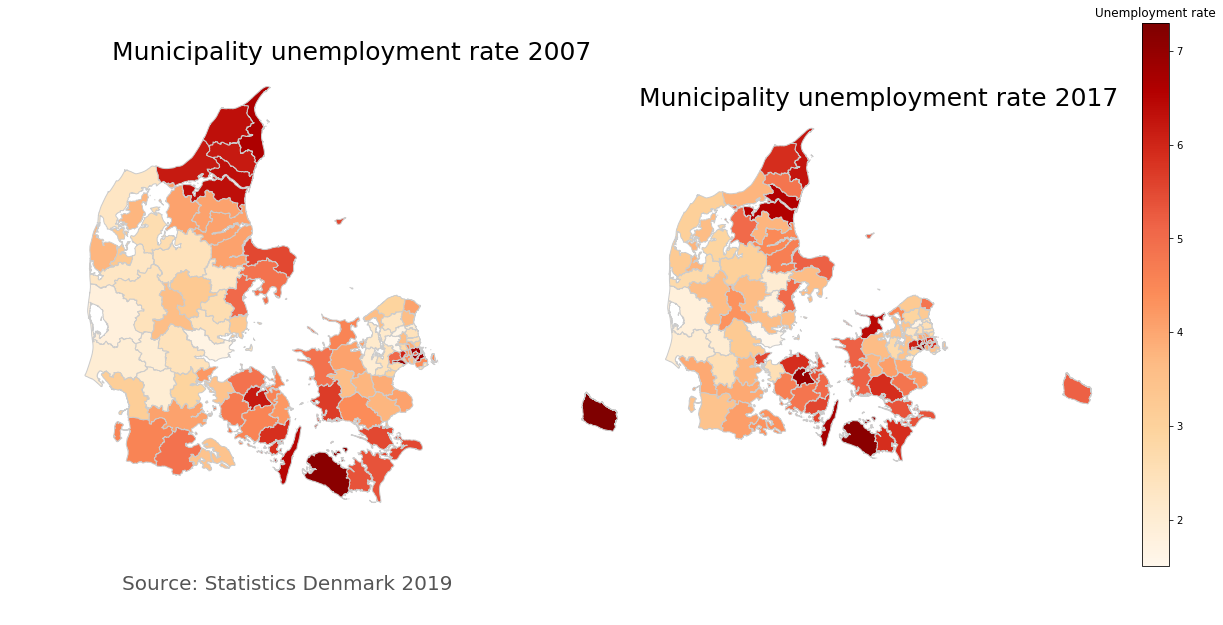

In [160]:
# create figure, axes, size, remove whitespace and align the size of the figures in Matplotlib
side_length = 10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(side_length * 2.1, side_length) , subplot_kw={'aspect': 1})
fig.subplots_adjust(hspace=0.0, wspace=0.0)

# We do not want axis to display values on our map - makes no sense
ax1.axis('off')
ax2.axis('off')

# add a title for map 1 - fix the size of the text.
ax1.set_title('Municipality unemployment rate 2007', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

## The actual plot is created with our colour map being set equal to OrRd
ax1=final_map.plot(column=VisVarUne07,  cmap='OrRd', ax=ax1, edgecolor='0.8')
# Attempt to get two maps of equal size
ax1.set_aspect('equal')

# create an annotation for the  data source
ax1.annotate('Source: Statistics Denmark 2019',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=20, color='#555555')

# add a title for map 2 - fix the size of the text.
ax2.set_title('Municipality unemployment rate 2017', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

## The actual second plot is created with our colour map being set equal to OrRd
ax2=final_map.plot(column=VisVarUne17,  cmap='OrRd', ax=ax2, edgecolor='0.8')
# Attempt to get two maps of equal size
ax2.set_aspect('equal')

## The color scale on the right is created in relation to the data with vmin and vmax. Same color theme.
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vminUNE, vmax=vmaxUNE))

# Empty array
sm._A = []

# Make a colour bar based on the color scale created above.
cbar = fig.colorbar(sm)

# Set a title for the color bar
cbar.ax.set_title('Unemployment rate')

plt.show()

In [161]:
# Laver ny variable for birth_rate index
merged_data1 = merged_data.copy()
merged_data1 = merged_data1.set_index("YEAR")

merged_data1['FERTILITY INDEX'] = merged_data1.groupby('AREA')['BIRTH_RATE_F'].transform(lambda x: x/x[2007]*100)
merged_data1.head()


,AREA,BIRTH_RATE,UNEMPLOYMENT_RATE,BIRTH_RATE_F,FERTILITY INDEX
YEAR,,,,,
2007,All Denmark,1843.5,3.6,1843.5,100.0
2007,Copenhagen,1547.0,5.8,1547.0,100.0
2007,Frederiksberg,1692.6,4.0,1692.6,100.0
2007,Dragør,2109.5,2.3,2109.5,100.0
2007,Tårnby,2227.0,3.5,2227.0,100.0


In [162]:
# Laver ny variable for unemployment index
merged_data1['UNEMPLOYMENT INDEX'] = merged_data1.groupby('AREA')['UNEMPLOYMENT_RATE'].transform(lambda x: x/x[2007]*100)
merged_data1.head()


,AREA,BIRTH_RATE,UNEMPLOYMENT_RATE,BIRTH_RATE_F,FERTILITY INDEX,UNEMPLOYMENT INDEX
YEAR,,,,,,
2007,All Denmark,1843.5,3.6,1843.5,100.0,100.0
2007,Copenhagen,1547.0,5.8,1547.0,100.0,100.0
2007,Frederiksberg,1692.6,4.0,1692.6,100.0,100.0
2007,Dragør,2109.5,2.3,2109.5,100.0,100.0
2007,Tårnby,2227.0,3.5,2227.0,100.0,100.0


In [163]:
#UNEMPLOYMENT RATE

def interactive_figure(fokus):
    # Choose nationality for the pie chart 
    merged_data2 = merged_data1[merged_data1.AREA.isin([fokus])]


    # Sum the observations grouped by the regions and plot the chart
    merged_data2.groupby('AREA')['UNEMPLOYMENT INDEX', 'FERTILITY INDEX'].plot(legend=True);
    plt.title('Development in fertilityrate and unemployment rate 2007-2017')
    #plt.figure(figsize=(20,10))
    plt.show()

liste=merged_data1.AREA.unique()

widgets.interact(interactive_figure,
    fokus=widgets.Dropdown(description="$Municipal$", options=liste, value='Slagelse'),);

interactive(children=(Dropdown(description='$Municipal$', index=40, options=('All Denmark', 'Copenhagen', 'Fre…

In [140]:
#CHANGE COLORS OF THE PLOTS

In [ ]:
#DETTE KODE SKAL SLETTES!
#FOD407_en_group = FOD407_en.groupby(['AREA','YEAR'])['BIRTH_RATE'].sum().reset_index()
#FOD407_en_group.head()